In [1]:
%load_ext autoreload
%autoreload 2

import pickle
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica as sl


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../../Datos/Datos_Modelo_3/Modelo_3_CL_0.csv', index_col=0) # importo mi modelo más importante
df.head()

,Sales,Quantity,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category
0,5175.171,2.000000,36.402569,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,388.599905,378.698910,395.849105,535.998912,612.262246,310.045378
1,2892.510,0.666667,36.188641,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,344.538120,288.102422,329.976337,533.515733,597.125192,311.180296
2,2862.675,0.666667,35.674493,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,403.526387,385.549974,387.917689,533.515733,597.125192,311.180296
3,1822.080,0.333333,35.570941,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,301.364100,383.698350,392.718023,476.662929,499.145512,311.570988
4,5083.960,0.666667,34.484046,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,268.076029,257.363652,268.076029,135.056957,78.340392,312.930088


In [3]:
df.describe()

,Sales,Quantity,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category
count,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000,20558.000000
mean,285.850531,0.182395,0.881042,0.150404,0.053361,0.195252,0.600983,0.529575,0.302364,0.168061,0.078899,0.298764,0.051805,0.570532,285.437658,285.809117,285.826905,285.827240,285.559219,285.877903
std,551.062627,0.769984,2.663530,0.357475,0.224758,0.396405,0.489708,0.499137,0.459293,0.373930,0.269587,0.457727,0.221638,0.495012,94.868778,69.498268,71.931923,181.246096,260.619785,59.004372
min,0.444000,-0.666667,-0.341963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.401738,183.829000,187.238393,135.056957,26.438223,39.582346
25%,32.400000,-0.333333,-0.229982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,246.363650,247.788743,222.360994,137.525936,75.640855,310.045378
50%,93.630300,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,271.500854,281.668066,271.500854,140.050386,127.769078,311.180296
75%,283.260000,0.666667,0.770018,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,344.486937,292.150334,336.008543,481.400655,517.815907,311.570988
max,9892.740000,3.666667,36.402569,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1288.800000,478.273199,395.849105,539.038771,1053.795385,312.930088


In [4]:
x= df.drop(columns='Sales')
y = df[['Sales']]

In [5]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [7]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [8]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[206.48280763],
       [216.86971763],
       [347.4432467 ]])

In [9]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[-53.38472255],
       [226.28978996],
       [247.05490467]])

In [10]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [11]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.720571,137.888210,88158.374466,296.914760
test,0.732935,133.220742,73701.183454,271.479619


Nos muestra métricas buenas, aunque no las mejores. Sí tienen consistencia entre ambos grupos train-test.

Text(0, 0.5, 'Predicciones (y_test_pred)')

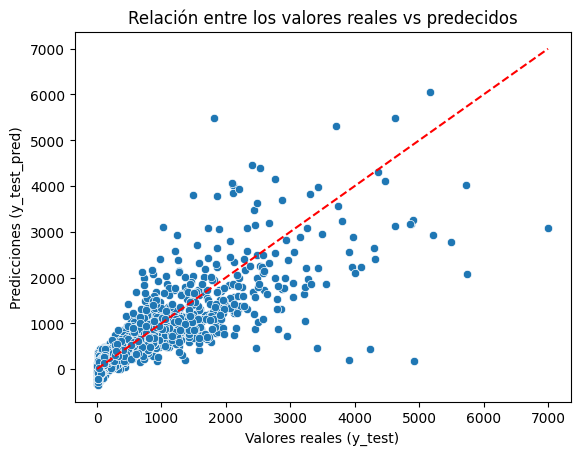

In [12]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

## Decision Tree

In [13]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [14]:
params_arbol_2 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [40,50,60],
    'min_samples_leaf': [18, 20,21],
    'max_leaf_nodes': [25,28,30,32,35]
}

In [15]:
params_arbol_3 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [16]:
params_arbol_4 = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [17]:
params_arbol_5 = {
    'max_depth': [5,7,10],
    'min_samples_split': [10,7,5],
    'min_samples_leaf': [10,9,12],
    'max_leaf_nodes': [30,35,38]
}

In [18]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'max_leaf_nodes': [30, 35, 38],
                         'min_samples_leaf': [10, 9, 12],
                         'min_samples_split': [10, 7, 5]},
             scoring='neg_mean_squared_error')

In [19]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [20]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=38, min_samples_leaf=10,
                      min_samples_split=10)

In [21]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [22]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [23]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.818519,97.544021,57256.268054,239.282820
test,0.823464,94.319999,48718.171561,220.721933


El decision tree eleva las métricas a mucho mejor, tanto en r2 como en RMSE. Además de que minimaliza la brecha entre grupos train-test.

In [24]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,0.078625,0.016062,0.004202,0.000818,7,38,10,10,"{'max_depth': 7, 'max_leaf_nodes': 38, 'min_sa...",-85507.668454,-81937.692497,-54917.759215,-60451.168002,-64751.723286,-69513.202291,12066.565469,1
46,0.066269,0.002733,0.005476,0.001511,7,38,10,7,"{'max_depth': 7, 'max_leaf_nodes': 38, 'min_sa...",-85507.668454,-81937.692497,-54917.759215,-60451.168002,-64751.723286,-69513.202291,12066.565469,1
47,0.089444,0.024653,0.004811,0.000681,7,38,10,5,"{'max_depth': 7, 'max_leaf_nodes': 38, 'min_sa...",-85507.668454,-81937.692497,-54917.759215,-60451.168002,-64751.723286,-69513.202291,12066.565469,1
73,0.088476,0.034583,0.021401,0.032515,10,38,10,7,"{'max_depth': 10, 'max_leaf_nodes': 38, 'min_s...",-85507.668454,-81937.692497,-55300.860476,-60451.168002,-65031.650355,-69645.807957,11952.392367,4
72,0.158904,0.060376,0.005836,0.002119,10,38,10,10,"{'max_depth': 10, 'max_leaf_nodes': 38, 'min_s...",-85507.668454,-81937.692497,-55300.860476,-60451.168002,-65031.650355,-69645.807957,11952.392367,4
74,0.090682,0.036640,0.023314,0.036833,10,38,10,5,"{'max_depth': 10, 'max_leaf_nodes': 38, 'min_s...",-85507.668454,-81937.692497,-55300.860476,-60451.168002,-65031.650355,-69645.807957,11952.392367,6
38,0.073696,0.019986,0.004021,0.000631,7,35,10,5,"{'max_depth': 7, 'max_leaf_nodes': 35, 'min_sa...",-87389.752147,-81915.993322,-55357.201549,-61989.989380,-64943.141992,-70319.215678,12231.340996,7
37,0.058115,0.002574,0.006268,0.001512,7,35,10,7,"{'max_depth': 7, 'max_leaf_nodes': 35, 'min_sa...",-87389.752147,-81915.993322,-55357.201549,-61989.989380,-64943.141992,-70319.215678,12231.340996,7
36,0.078056,0.020742,0.004603,0.000796,7,35,10,10,"{'max_depth': 7, 'max_leaf_nodes': 35, 'min_sa...",-87389.752147,-81915.993322,-55357.201549,-61989.989380,-64943.141992,-70319.215678,12231.340996,7
65,0.065213,0.011770,0.004214,0.000509,10,35,10,5,"{'max_depth': 10, 'max_leaf_nodes': 35, 'min_s...",-87389.752147,-81915.993322,-55696.605597,-61989.989380,-65690.820367,-70536.632163,12085.287724,10


In [25]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
45,7,38,10,10,-69513.202291
46,7,38,10,7,-69513.202291
47,7,38,10,5,-69513.202291
73,10,38,10,7,-69645.807957
72,10,38,10,10,-69645.807957
...,...,...,...,...,...
14,5,35,9,5,-76312.451024
21,5,38,9,10,-76312.451024
5,5,30,9,5,-76330.800991
4,5,30,9,7,-76330.800991


In [26]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [27]:
df_rmse_prof

,param_max_depth,MSE
0,5,274.553814
1,7,267.729327
2,10,267.883538


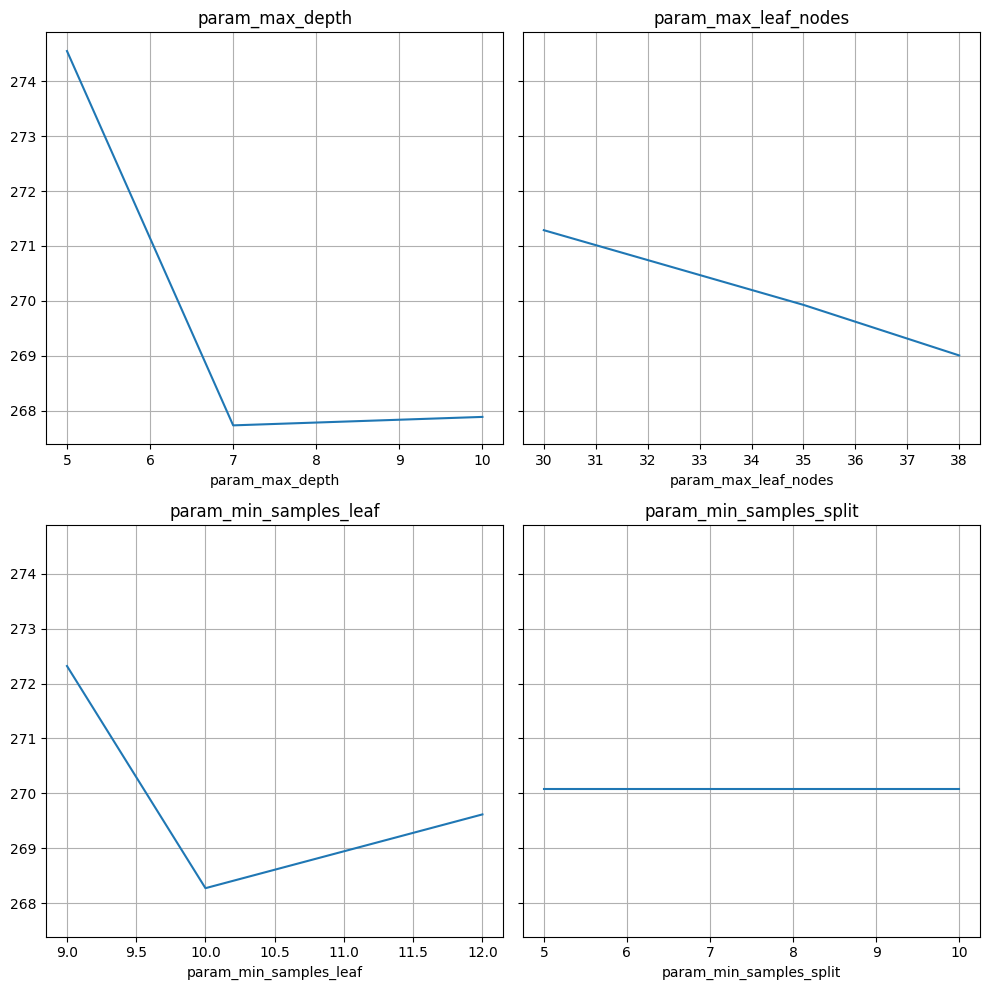

In [28]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [29]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

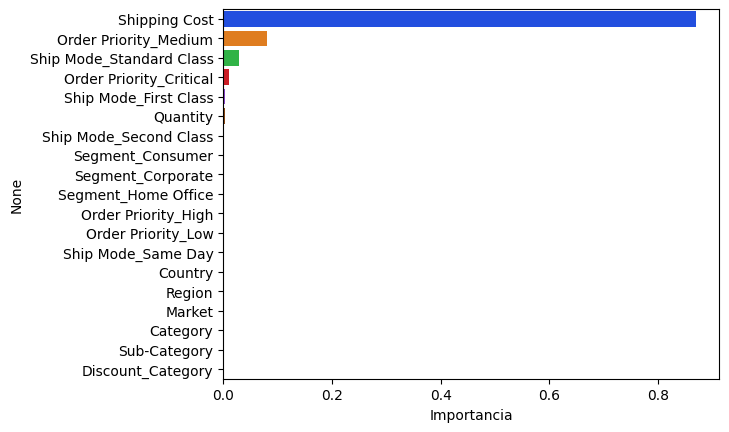

In [30]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

## Random Forest

In [31]:
params_rrf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,8,12,16],
    'max_depth': [5,6,7],
    'min_samples_split': [45,50,55],
    'min_samples_leaf': [20], 
    'max_leaf_nodes': [45,50,55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [32]:
modelo_final_rrf

RandomForestRegressor(max_depth=7, max_features=16, max_leaf_nodes=50,
                      min_samples_leaf=20, min_samples_split=45,
                      n_estimators=250, n_jobs=-1, random_state=42)

In [33]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.826607,87.463709,54704.655357,233.890263
test,0.839273,85.934782,44355.329974,210.607051


Unas métricas con un buen entrenamiento, sin overfitting ni underfitting. Además no existen indicios de diferencias marcadas entre grupos.

### Random Distinto

In [34]:
params_rf = {
    'n_estimators': [225,250,300],
    'max_features': [15,18,20,22],
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [42,45,28,50],
    'min_samples_leaf': [19,20,21], 
    'max_leaf_nodes': [50]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [35]:
modelo_final_rf

RandomForestRegressor(max_depth=7, max_features=15, max_leaf_nodes=50,
                      min_samples_leaf=19, min_samples_split=28,
                      n_estimators=300, random_state=42)

In [36]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.829758,87.476812,53710.412385,231.755070
test,0.841822,85.852728,43651.960921,208.930517


## Gradient Booster

In [37]:
params_gb = {
    'n_estimators': [115,150,200,300],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,7,9],
    'min_samples_split': [7,45,50,100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [38]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=20, min_samples_split=45,
                          n_estimators=115, random_state=42)

In [39]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.859693,83.114832,44266.105848,210.395118
test,0.858245,80.979655,39119.705217,197.787020


Mejor modelo

## XGB

In [40]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [41]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.764570,121.539865,74276.964921,272.538006
test,0.782385,117.320588,60054.483962,245.060164
